In [1]:
# import xgeboost 
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import DataFarme
#df = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/clean_gde.csv", index_col="Unnamed: 0")
df = pd.read_parquet("https://github.com/Immobilienrechner-Challenge/data/blob/main/immo_data_202208_v2.parquet?raw=true")

# print head of DataFrame
print("After Reading Data")
display(df.head(2))

# Create Dummies variable for type
df = pd.get_dummies(df, columns = ["type"])
print("After creating Dummies")
display(df.head(2))

# Select all numerical features and target variable from df
df_num = df.select_dtypes(include=np.number)
print("After Selecting Numerical Features")
display(df_num.head(2))

# drop columns with more than 10% missing values
df_num = df_num.dropna(thresh=len(df_num)*0.9, axis=1)
print("After Dropping Columns with more than 10% missing values")
print(df_num.shape)

# drop na values
df_num = df_num.dropna()
print("After Dropping NA")
print(df_num.shape)
print("Number of Na Value in Df", sum(df_num.isna().sum()))

# split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_num.drop("price_cleaned", axis=1), df_num["price_cleaned"], test_size=0.2, random_state=42)

# Display the X_train, X_test, y_train, y_test
print("X_train")
display(X_train.head(2))
print("X_test")
display(X_test.head(2))
print("y_train")
display(y_train.head(2))
print("y_test")
display(y_test.head(2))



After Reading Data


,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,None,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,None,None,None,NaN,None,5023.0,NaN,None,None,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,None,None,None,NaN,None,5023.0,NaN,None,None,NaN


After creating Dummies


,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,Biberstein,100 m²,None,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,1,0,0,0,0,0,0,0,0,0
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,0,0,0,0,0,0,0,0,1,0


After Selecting Numerical Features


,lat,lon,index,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,47.4171,8.0856,16620,0.511176,0.286451,0.090908,47.415927,8.08584,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,47.4195,8.0827,16620,0.511176,0.286451,0.090908,47.415927,8.08584,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


After Dropping Columns with more than 10% missing values
(22481, 95)
After Dropping NA
(19587, 95)
Number of Na Value in Df 0
X_train


,lat,lon,index,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
16544,46.497487,6.830535,2178,0.55836,0.547122,0.489897,46.486367,6.825721,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2183,46.489756,7.261584,12716,0.19616,0.105270,0.045618,46.488320,7.263313,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


X_test


,lat,lon,index,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
12828,46.29861,7.878144,69770,0.017204,0.001765,0.00000,46.298826,7.878296,0.037826,0.000345,...,1,0,0,0,0,0,0,0,0,0
7822,46.00501,8.952028,12716,0.015625,0.035209,0.03266,46.010483,8.946119,0.021480,0.025852,...,1,0,0,0,0,0,0,0,0,0


y_train


16544    1190000.0
2183     1600000.0
Name: price_cleaned, dtype: float64

y_test


12828    1420000.0
7822     5500000.0
Name: price_cleaned, dtype: float64

---
# Xgboost Model

In [2]:
# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Use XGBoost to train the model
params = {
    "objective": "reg:squarederror",
    "max_depth": 5,
    "learning_rate": 0.05,
    "subsample": 0.7,
    "colsample_bytree": 0.5,
    "alpha": 0.1,
    "lambda": 0.1,
    "eval_metric": "mape",
    "seed": 42,
}


# Train model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Predict on test set
preds = model.predict(dtest)

# get xgb R2 score model
from sklearn.metrics import r2_score
print("r2_score:", r2_score(y_test, preds))

# get xgb MAPE score model
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE score:", mean_absolute_percentage_error(y_test, preds))


r2_score: 0.8205941244049856
MAPE score: 0.47163388272947854


----
# Optimizing Hyperparamater Xgboost

In [3]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# define model
model = xgb.XGBRegressor()

# define grid
param_grid = {
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.5, 0.7],
    "alpha": [0.1, 0.3],
    "lambda": [0.1, 0.3],
}

# define evaluation
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# define search
search = RandomizedSearchCV(model, param_grid, scoring="r2", n_iter=100, cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train, y_train)

# summarize
print("Best MAE: %.3f using %s" % (results.best_score_, results.best_params_))

# summarize all
means = results.cv_results_["mean_test_score"]
stds = results.cv_results_["std_test_score"]
params = results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# get best model
best_model = results.best_estimator_

# predict on test set
yhat = best_model.predict(X_test)

# get best model R2 score
print("r2_score:", r2_score(y_test, yhat))

# get best model MAPE score
print("MAPE score:", mean_absolute_percentage_error(y_test, yhat))

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best MAE: 0.758 using {'subsample': 0.8, 'max_depth': 5, 'learning_rate': 0.05, 'lambda': 0.3, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.421861 (0.029562) with: {'subsample': 0.7, 'max_depth': 3, 'learning_rate': 0.01, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.423023 (0.029349) with: {'subsample': 0.8, 'max_depth': 3, 'learning_rate': 0.01, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.499518 (0.031098) with: {'subsample': 0.7, 'max_depth': 5, 'learning_rate': 0.01, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.499820 (0.030563) with: {'subsample': 0.8, 'max_depth': 5, 'learning_rate': 0.01, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.706946 (0.030620) with: {'subsample': 0.7, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.711835 (0.026095) with: {'subsample': 0.8, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.1}
0.750130 (0.019961) with: {'subsample'

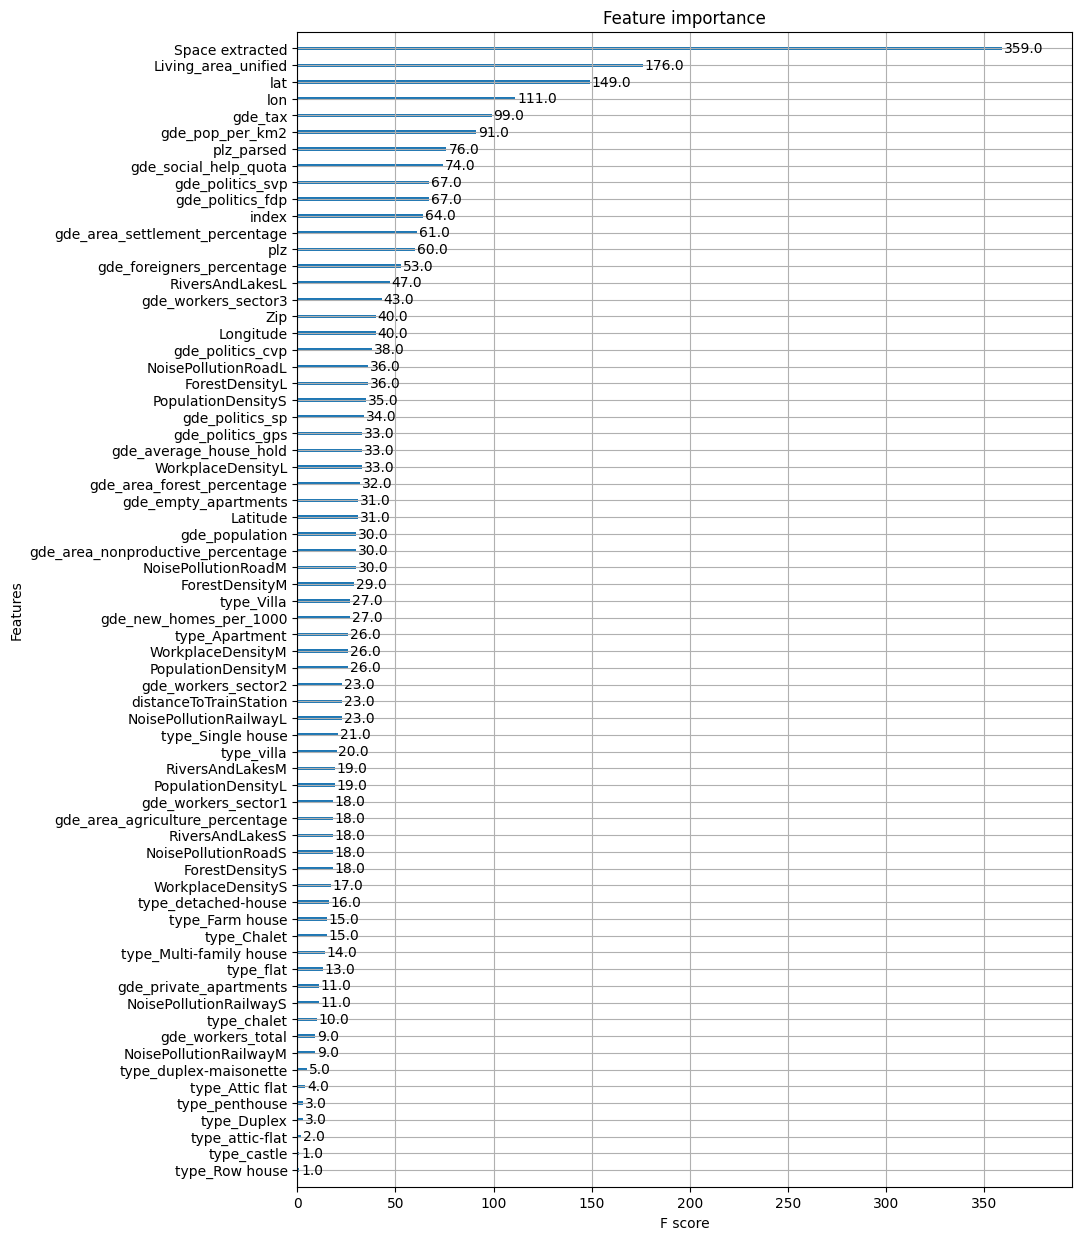

In [4]:
# plot feature importance
plt.rcParams["figure.figsize"] = (10, 15)
xgb.plot_importance(best_model)
plt.show()

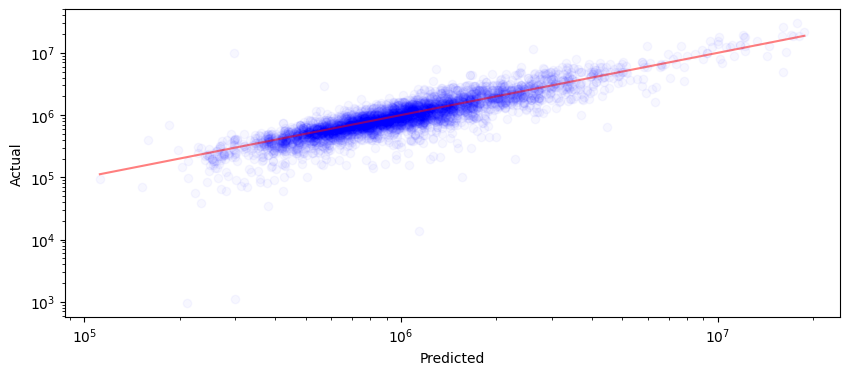

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, y_test, "o", color="blue", alpha=0.03)
plt.plot([np.min(yhat), np.max(yhat)], [np.min(yhat), np.max(yhat)], "r", alpha = 0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xscale("log")
plt.yscale("log")
